In [1]:
from KGS import *
import h5py
import scipp as sc
import ipywidgets as ipw
from scipy.stats import chi2

def to_l(qx):
    c = 3.13
    c_star = 2 * np.pi / c
    return qx / c_star

def to_h(qy):
    a = 4.87
    a_star = 2 * np.pi / a
    return qy / a_star

graph = {'l': to_l}
graph2 = {'h': to_h}

### Common slicing

In [2]:
E_min = -0.5 * sc.Unit('meV')
E_max = 8 * sc.Unit('meV')

h_layer = 1 * sc.Unit('Å^(-1)')

l_slice = -0.25 * sc.Unit('Å^(-1)') # gammel værdi -0.25

l_slice2 = 0.5 * sc.Unit('Å^(-1)') # gammel værdi -0.25

h_min = -2 * sc.Unit('Å^(-1)')
h_max = 4.0 * sc.Unit('Å^(-1)')

E_layer = 5.9 * sc.Unit('meV')

E_range = np.linspace(0,8,1000)

mpl.rcParams['font.size']        = 15 # standard er 45

### Load 0T data

In [3]:
with h5py.File('Magnon_v3_1ms_0T.hdf5', 'r') as file:
    data_I = file['data/values'][:]
    variances_I = file['data/variances'][:]

    qx = file['coords/elem_000_qx/values'][:]
    qy = file['coords/elem_001_qy/values'][:]
    deltaE = file['coords/elem_002_deltaE/values'][:]

print(np.shape(data_I))

qx_1ms = sc.array(dims=["qx"], values=qx, unit="Å^(-1)")
qy_1ms = sc.array(dims=["qy"], values=qy, unit="Å^(-1)")
deltaE_1ms = sc.array(dims=["deltaE"], values=deltaE, unit="meV")

sliced_1ms = sc.DataArray(
    data=sc.array(dims=['qx', 'qy', 'deltaE'], values=data_I, unit="arb. units", variances=variances_I),  #, variances=settings[1]
    coords={"qx": qx_1ms, "qy": qy_1ms, "deltaE":deltaE_1ms}
)

transformed_0T = sliced_1ms.transform_coords(['l'], graph=graph)
sliced_0T = transformed_0T.transform_coords(['h'], graph=graph2)

(112, 87, 95)


In [4]:
"""
2D Slice at a given DeltaE-value: returns a colorplot with l on the x-axis and h on the y-axis.  
"""

p1_Energy_0T = sliced_0T['deltaE', E_layer]['h', h_min:h_max].transpose()

h_layer_0T = sliced_0T.coords['h'].values


"""
2D Slice at a given h-value: returns a colorplot with l on the x-axis.  
"""

p1_0T = sliced_0T['h', h_layer]['deltaE', E_min:E_max].transpose()

"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

p2_0T = p1_0T['deltaE', E_min:E_max]['l',l_slice]
E_0T = p2_0T.coords['deltaE'].values
E_0T = (E_0T[:-1] + E_0T[1:]) / 2.0


#### Plotting of the cut

guess_0T_1 = {'A':1, 'mu': 6, 'sigma':0.5}

fit_0T_1 = fit(E_0T, p2_0T.values, np.sqrt(p2_0T.variances),gauss, guess_0T_1)
fit_0T_1.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.79                      │              Nfcn = 373              │
│ EDM = 7.22e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │   0.92    │   0.07    │            │            │         │         │       │
│ 1 │ mu    │   4.899   │   0.012   │            │            │         │         │       │
│ 2 │ sigma │   0.166   │   0.007   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         A        mu     sigma │
├───────┼───────────────────────────────┤
│     A │   0.00558 -0.000131 -0.000248 │
│    mu │ -0.000131  0.000149  3.58e-05 │
│ sigma │ -0.000248  3.58e-05  4.31e-05 │
└───────┴───────────────────────────────┘

In [5]:

"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

p2_0Tz = p1_0T['deltaE', E_min:E_max]['l',l_slice2]
E_0Tz = p2_0Tz.coords['deltaE'].values
E_0Tz = (E_0Tz[:-1] + E_0Tz[1:]) / 2.0


#### Plotting of the cut

guess_0T_1z = {'A':1, 'mu': 7, 'sigma':0.5}

fit_0T_1z = fit(E_0Tz, p2_0Tz.values, np.sqrt(p2_0Tz.variances),gauss, guess_0T_1z)
fit_0T_1z.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.4436                     │              Nfcn = 506              │
│ EDM = 2.25e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │   1.12    │   0.16    │            │            │         │         │       │
│ 1 │ mu    │   6.733   │   0.009   │            │            │         │         │       │
│ 2 │ sigma │   0.074   │   0.006   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         A        mu     sigma │
├───────┼───────────────────────────────┤
│     A │    0.0246 -0.000219 -0.000496 │
│    mu │ -0.000219  8.55e-05  2.48e-05 │
│ sigma │ -0.000496  2.48e-05  3.27e-05 │
└───────┴───────────────────────────────┘

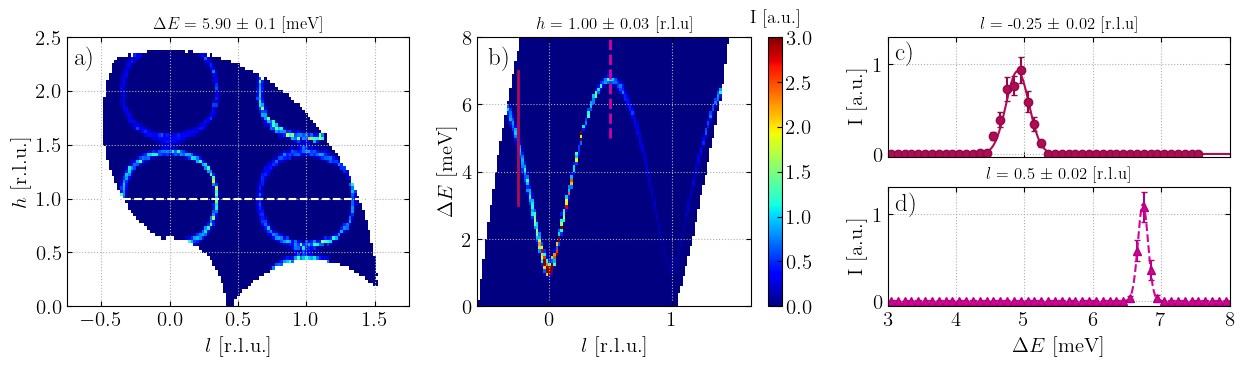

In [6]:


import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15,3.5))

# Create a 1×2 layout first for ax[0] and ax[1]
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1])
gs.update(wspace=0.2, hspace=0.3)

# --------------------------------------------------
# ax[0] and ax[1] remain the same
# --------------------------------------------------
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

# --------------------------------------------------
# Replace the single ax[2] with two stacked axes
# --------------------------------------------------
gs_right = gridspec.GridSpecFromSubplotSpec(
    2, 1,
    subplot_spec=gs[2],     # this occupies the space where ax[2] originally was
    height_ratios=[1,1],    # equally sized
    hspace=0.25
)

ax2_top = fig.add_subplot(gs_right[0])
ax2_bottom = fig.add_subplot(gs_right[1])

"""
B = 0T
"""
im_0T = ax0.pcolormesh(p1_Energy_0T.coords['l'].values, p1_Energy_0T.coords['h'].values, p1_Energy_0T.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
#cbar = plt.colorbar(im0)
#cbar.set_label('I [a.u.]')
ax0.plot(np.linspace(-0.5,1.5,100), np.ones(100), '--', color='white')
ax0.set_xlim(-0.75,1.75)
ax0.set_ylim(0,2.5)
ax0.set_xlabel('$l$ [r.l.u.]')
ax0.set_ylabel('$h$ [r.l.u.]')
ax0.set_title(rf"$\Delta E =$ {E_layer.value:.2f} $\pm$ 0.1 [meV]", fontsize=12)
ax0.text(-0.7, 2.25, r'a)', weight='bold', color='black', fontsize=18)
ax0.grid(linestyle='dotted')



im1_0T = ax1.pcolormesh(p1_0T.coords['l'].values, p1_0T.coords['deltaE'].values, p1_0T.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
cbar_0T = plt.colorbar(im1_0T)
cbar_0T.ax.set_title('I [a.u.]', fontsize=13, pad=10)
ax1.plot(np.ones(100)*l_slice.value, np.linspace(3,7,100), '-', color='#B00B55',lw=2)
ax1.plot(np.ones(100)*l_slice2.value, np.linspace(5,8,100), '--', color='#d2039b',lw=2)  
ax1.set_ylim(0,8)
ax1.set_xlabel('$l$ [r.l.u.]')
ax1.set_ylabel('$\Delta E$ [meV]')
ax1.set_title(rf"$h =$ {h_layer.value:.2f} $\pm$ 0.03 [r.l.u]", fontsize=12)
ax1.text(-0.5, 7.2, r'b)', weight='bold', color='black', fontsize=18)
ax1.grid(linestyle='dotted')


ax2_top.errorbar(E_0T, p2_0T.values, np.sqrt(p2_0T.variances),
                 fmt='o', markerfacecolor='#B00B55',
                 ecolor='#910946', mew=1, markeredgecolor='#910946',
                 label='B = 3T data')

ax2_top.plot(E_range, gauss(E_range, *fit_0T_1.values),
             '-', color='#B00B55', label='Fit')

ax2_top.set_ylabel("I [a.u.]")
ax2_top.set_xlim(3,8)
ax2_top.set_ylim(-0.03,1.3)
ax2_top.grid(linestyle='dotted')
ax2_top.set_xticklabels([])  # remove x-labels for top plot
#ax2_top.legend(fontsize=9, loc='upper right')
ax2_top.text(3.1, 1.05, r'c)', weight='bold', color='black', fontsize=18)
ax2_top.set_title(f'$l =$ -0.25 $\pm$ 0.02 [r.l.u]', fontsize=12)


ax2_bottom.errorbar(E_0Tz, p2_0Tz.values, np.sqrt(p2_0Tz.variances),fmt='^', color="#d2039b", ecolor='#b3007a', mew=1, markeredgecolor='#b3007a', label='B = 0T data')

ax2_bottom.plot(E_range, gauss(E_range, *fit_0T_1z.values), '--', color='#d2039b', label='Fit')

ax2_bottom.text(3.1, 1.05, r'd)', weight='bold', color='black', fontsize=18)
ax2_bottom.set_xlim(3,8)
#ax2_bottom.legend(fontsize=9, loc='upper center')
ax2_bottom.grid(linestyle='dotted')
ax2_bottom.set_xlabel('$\\Delta E$ [meV]')
ax2_bottom.set_ylabel("I [a.u.]")
ax2_bottom.grid(linestyle='dotted')
ax2_bottom.set_title(f'$l =$ 0.5 $\pm$ 0.02 [r.l.u]', fontsize=12)


plt.savefig('../../Figures/PNG/Magnon_zeeman_0T.png', format='png',dpi=200, bbox_inches='tight')
plt.savefig('../../Figures/SVG/Magnon_zeeman_0T.svg', format='svg',dpi=200, bbox_inches='tight')

### Load 1 T data

In [ ]:
with h5py.File('Magnon_v3_1ms_1T.hdf5', 'r') as file:
    data_I = file['data/values'][:]
    variances_I = file['data/variances'][:]

    qx = file['coords/elem_000_qx/values'][:]
    qy = file['coords/elem_001_qy/values'][:]
    deltaE = file['coords/elem_002_deltaE/values'][:]

print(np.shape(data_I))

qx_1ms = sc.array(dims=["qx"], values=qx, unit="Å^(-1)")
qy_1ms = sc.array(dims=["qy"], values=qy, unit="Å^(-1)")
deltaE_1ms = sc.array(dims=["deltaE"], values=deltaE, unit="meV")

sliced_1ms = sc.DataArray(
    data=sc.array(dims=['qx', 'qy', 'deltaE'], values=data_I, unit="arb. units", variances=variances_I),  #, variances=settings[1]
    coords={"qx": qx_1ms, "qy": qy_1ms, "deltaE":deltaE_1ms}
)

transformed_1T = sliced_1ms.transform_coords(['l'], graph=graph)
sliced_1T = transformed_1T.transform_coords(['h'], graph=graph2)

(112, 87, 95)


In [8]:

"""
2D Slice at a given DeltaE-value: returns a colorplot with l on the x-axis and h on the y-axis.  
"""

p1_Energy_1T = sliced_1T['deltaE', E_layer]['h', h_min:h_max].transpose()

h_layer_1T = sliced_1T.coords['h'].values


"""
2D Slice at a given h-value: returns a colorplot with l on the x-axis.  
"""

p1_1T = sliced_1T['h', h_layer]['deltaE', E_min:E_max].transpose()

"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

l_size = p1_1T.coords['l'].values

p2_1T = p1_1T['deltaE', E_min:E_max]['l',l_slice]
E_1T = p2_1T.coords['deltaE'].values
E_1T = (E_1T[:-1] + E_1T[1:]) / 2.0


#### Plotting of the cut

guess_1T_1 = {'A':1, 'mu': 5.5, 'sigma':0.5}

fit_1T_1 = fit(E_1T, p2_1T.values, np.sqrt(p2_1T.variances),gauss, guess_1T_1)
fit_1T_1.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 24.52                      │              Nfcn = 473              │
│ EDM = 1.85e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │   0.86    │   0.08    │            │            │         │         │       │
│ 1 │ mu    │   4.928   │   0.012   │            │            │         │         │       │
│ 2 │ sigma │   0.179   │   0.010   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         A        mu     sigma │
├───────┼───────────────────────────────┤
│     A │   0.00677  0.000131 -0.000583 │
│    mu │  0.000131  0.000133 -1.53e-05 │
│ sigma │ -0.000583 -1.53e-05  0.000104 │
└───────┴───────────────────────────────┘

In [9]:

"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

p2_1Tz = p1_1T['deltaE', E_min:E_max]['l',l_slice2]
E_1Tz = p2_1Tz.coords['deltaE'].values
E_1Tz = (E_1Tz[:-1] + E_1Tz[1:]) / 2.0


#### Plotting of the cut

guess_1T_1z = {'A':1, 'mu': 6.7, 'sigma':0.5}

fit_1T_1z = fit(E_1Tz, p2_1Tz.values, np.sqrt(p2_1Tz.variances),gauss, guess_1T_1z)
fit_1T_1z.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.18                       │              Nfcn = 449              │
│ EDM = 6.01e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │   0.63    │   0.08    │            │            │         │         │       │
│ 1 │ mu    │   6.724   │   0.016   │            │            │         │         │       │
│ 2 │ sigma │   0.128   │   0.010   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         A        mu     sigma │
├───────┼───────────────────────────────┤
│     A │   0.00634 -0.000104 -0.000382 │
│    mu │ -0.000104  0.000257  4.94e-05 │
│ sigma │ -0.000382  4.94e-05  9.51e-05 │
└───────┴───────────────────────────────┘

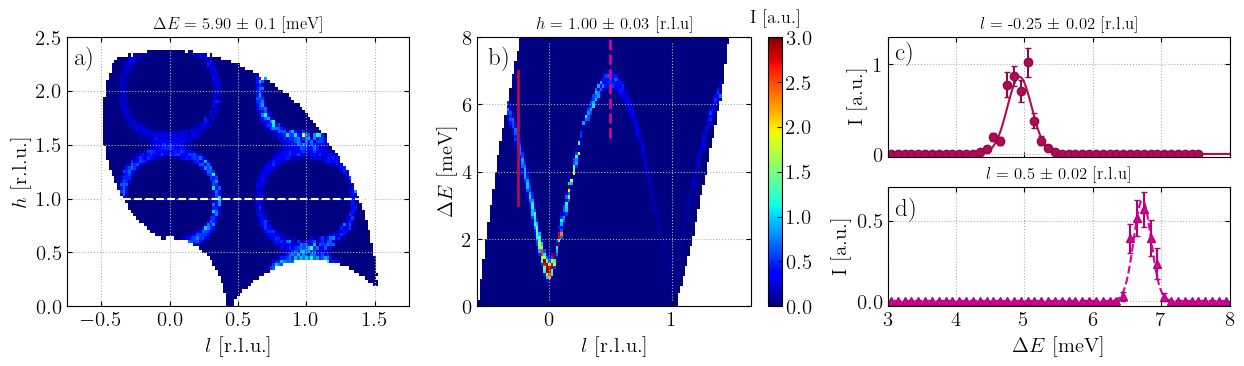

In [10]:
fig = plt.figure(figsize=(15,3.5))

# Create a 1×2 layout first for ax[0] and ax[1]
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1])
gs.update(wspace=0.2, hspace=0.3)

# --------------------------------------------------
# ax[0] and ax[1] remain the same
# --------------------------------------------------
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

# --------------------------------------------------
# Replace the single ax[2] with two stacked axes
# --------------------------------------------------
gs_right = gridspec.GridSpecFromSubplotSpec(
    2, 1,
    subplot_spec=gs[2],     # this occupies the space where ax[2] originally was
    height_ratios=[1,1],    # equally sized
    hspace=0.25
)

ax2_top = fig.add_subplot(gs_right[0])
ax2_bottom = fig.add_subplot(gs_right[1])

"""
B = 1T
"""
im_1T = ax0.pcolormesh(p1_Energy_1T.coords['l'].values, p1_Energy_1T.coords['h'].values, p1_Energy_1T.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
#cbar = plt.colorbar(im0)
#cbar.set_label('I [a.u.]')
ax0.plot(np.linspace(-0.5,1.5,100), np.ones(100), '--', color='white')
ax0.set_xlim(-0.75,1.75)
ax0.set_ylim(0,2.5)
ax0.set_xlabel('$l$ [r.l.u.]')
ax0.set_ylabel('$h$ [r.l.u.]')
ax0.set_title(rf"$\Delta E =$ {E_layer.value:.2f} $\pm$ 0.1 [meV]", fontsize=12)
ax0.text(-0.7, 2.25, r'a)', weight='bold', color='black', fontsize=18)
ax0.grid(linestyle='dotted')



im1_1T = ax1.pcolormesh(p1_1T.coords['l'].values, p1_1T.coords['deltaE'].values, p1_1T.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
cbar_1T = plt.colorbar(im1_1T)
cbar_1T.ax.set_title('I [a.u.]', fontsize=13, pad=10)
ax1.plot(np.ones(100)*l_slice.value, np.linspace(3,7,100), '-', color='#B00B55',lw=2)
ax1.plot(np.ones(100)*l_slice2.value, np.linspace(5,8,100), '--', color='#d2039b',lw=2)  
ax1.set_ylim(0,8)
ax1.set_xlabel('$l$ [r.l.u.]')
ax1.set_ylabel('$\Delta E$ [meV]')
ax1.set_title(rf"$h =$ {h_layer.value:.2f} $\pm$ 0.03 [r.l.u]", fontsize=12)
ax1.text(-0.5, 7.2, r'b)', weight='bold', color='black', fontsize=18)
ax1.grid(linestyle='dotted')


ax2_top.errorbar(E_1T, p2_1T.values, np.sqrt(p2_1T.variances),
                 fmt='o', markerfacecolor='#B00B55',
                 ecolor='#910946', mew=1, markeredgecolor='#910946',
                 label='B = 3T data')

ax2_top.plot(E_range, gauss(E_range, *fit_1T_1.values),
             '-', color='#B00B55', label='Fit')

ax2_top.set_ylabel("I [a.u.]")
ax2_top.set_xlim(3,8)
ax2_top.set_ylim(-0.03,1.3)
ax2_top.grid(linestyle='dotted')
ax2_top.set_xticklabels([])  # remove x-labels for top plot
#ax2_top.legend(fontsize=9, loc='upper right')
ax2_top.text(3.1, 1.05, r'c)', weight='bold', color='black', fontsize=18)
ax2_top.set_title(f'$l =$ -0.25 $\pm$ 0.02 [r.l.u]', fontsize=12)


ax2_bottom.errorbar(E_1Tz, p2_1Tz.values, np.sqrt(p2_1Tz.variances),fmt='^', color="#d2039b", ecolor='#b3007a', mew=1, markeredgecolor='#b3007a', label='B = 1T data')

ax2_bottom.plot(E_range, gauss(E_range, *fit_1T_1z.values), '--', color='#d2039b', label='Fit')

ax2_bottom.text(3.1, 0.53, r'd)', weight='bold', color='black', fontsize=18)
ax2_bottom.set_xlim(3,8)
#ax2_bottom.legend(fontsize=9, loc='upper center')
ax2_bottom.grid(linestyle='dotted')
ax2_bottom.set_xlabel('$\\Delta E$ [meV]')
ax2_bottom.set_ylabel("I [a.u.]")
ax2_bottom.grid(linestyle='dotted')
ax2_bottom.set_title(f'$l =$ 0.5 $\pm$ 0.02 [r.l.u]', fontsize=12)


plt.savefig('../../Figures/PNG/Magnon_zeeman_1T.png', format='png',dpi=200, bbox_inches='tight')
plt.savefig('../../Figures/SVG/Magnon_zeeman_1T.svg', format='svg',dpi=200, bbox_inches='tight')

# Load 1 T and 0.3 ms

In [41]:
with h5py.File('Magnon_v3_0p3ms_1T.hdf5', 'r') as file:
    data_I = file['data/values'][:]
    variances_I = file['data/variances'][:]

    qx = file['coords/elem_000_qx/values'][:]
    qy = file['coords/elem_001_qy/values'][:]
    deltaE = file['coords/elem_002_deltaE/values'][:]

print(np.shape(data_I))

qx_1ms = sc.array(dims=["qx"], values=qx, unit="Å^(-1)")
qy_1ms = sc.array(dims=["qy"], values=qy, unit="Å^(-1)")
deltaE_1ms = sc.array(dims=["deltaE"], values=deltaE, unit="meV")

sliced_1ms = sc.DataArray(
    data=sc.array(dims=['qx', 'qy', 'deltaE'], values=data_I, unit="arb. units", variances=variances_I),  #, variances=settings[1]
    coords={"qx": qx_1ms, "qy": qy_1ms, "deltaE":deltaE_1ms}
)

transformed_0p3_1T = sliced_1ms.transform_coords(['l'], graph=graph)
sliced_0p3_1T = transformed_0p3_1T.transform_coords(['h'], graph=graph2)

(112, 87, 95)


In [42]:
"""
2D Slice at a given DeltaE-value: returns a colorplot with l on the x-axis and h on the y-axis.  
"""

p1_Energy_0p3_1T = sliced_0p3_1T['deltaE', E_layer]['h', h_min:h_max].transpose()

h_layer_0p3_1T = sliced_0p3_1T.coords['h'].values


"""
2D Slice at a given h-value: returns a colorplot with l on the x-axis.  
"""

p1_0p3_1T = sliced_0p3_1T['h', h_layer]['deltaE', E_min:E_max].transpose()

"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

l_size = p1_0p3_1T.coords['l'].values

p2_0p3_1T = p1_0p3_1T['deltaE', E_min:E_max]['l',l_slice]
E_0p3_1T = p2_0p3_1T.coords['deltaE'].values
E_0p3_1T = (E_0p3_1T[:-1] + E_0p3_1T[1:]) / 2.0


#### Plotting of the cut

guess_0p3_1T_1 = {'A':1, 'mu': 5.5, 'sigma':0.5}

fit_0p3_1T_1 = fit(E_0p3_1T, p2_0p3_1T.values, np.sqrt(p2_0p3_1T.variances),gauss, guess_0p3_1T_1)
fit_0p3_1T_1.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.99                       │              Nfcn = 469              │
│ EDM = 1.23e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │   0.249   │   0.020   │            │            │         │         │       │
│ 1 │ mu    │   4.899   │   0.012   │            │            │         │         │       │
│ 2 │ sigma │   0.188   │   0.007   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         A        mu     sigma │
├───────┼───────────────────────────────┤
│     A │  0.000387 -1.51e-05 -7.44e-05 │
│    mu │ -1.51e-05  0.000144  1.63e-05 │
│ sigma │ -7.44e-05  1.63e-05  5.02e-05 │
└───────┴───────────────────────────────┘

In [43]:
"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

p2_0p3_1Tz = p1_0p3_1T['deltaE', E_min:E_max]['l',l_slice2]
E_0p3_1Tz = p2_0p3_1Tz.coords['deltaE'].values
E_0p3_1Tz = (E_0p3_1Tz[:-1] + E_0p3_1Tz[1:]) / 2.0


#### Plotting of the cut

guess_0p3_1T_1z = {'A':1, 'mu': 6.7, 'sigma':0.5}

fit_0p3_1T_1z = fit(E_0p3_1Tz, p2_0p3_1Tz.values, np.sqrt(p2_0p3_1Tz.variances),gauss, guess_0p3_1T_1z)
fit_0p3_1T_1z.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 21.75                      │              Nfcn = 394              │
│ EDM = 4.2e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │   0.16    │   0.04    │            │            │         │         │       │
│ 1 │ mu    │   6.54    │   0.11    │            │            │         │         │       │
│ 2 │ sigma │   -0.19   │   0.05    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │        A       mu    sigma │
├───────┼────────────────────────────┤
│     A │  0.00136 -0.00308 -0.00111 │
│    mu │ -0.00308   0.0125  0.00561 │
│ sigma │ -0.00111  0.00561   0.0029 │
└───────┴────────────────────────────┘

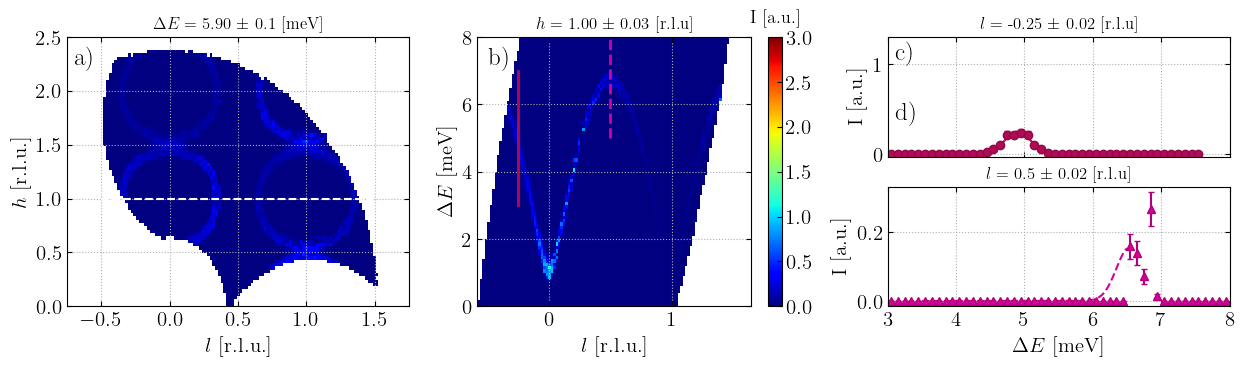

In [44]:
fig = plt.figure(figsize=(15,3.5))

# Create a 1×2 layout first for ax[0] and ax[1]
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1])
gs.update(wspace=0.2, hspace=0.3)

# --------------------------------------------------
# ax[0] and ax[1] remain the same
# --------------------------------------------------
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

# --------------------------------------------------
# Replace the single ax[2] with two stacked axes
# --------------------------------------------------
gs_right = gridspec.GridSpecFromSubplotSpec(
    2, 1,
    subplot_spec=gs[2],     # this occupies the space where ax[2] originally was
    height_ratios=[1,1],    # equally sized
    hspace=0.25
)

ax2_top = fig.add_subplot(gs_right[0])
ax2_bottom = fig.add_subplot(gs_right[1])

"""
B = 1T
"""
im_0p3_1T = ax0.pcolormesh(p1_Energy_0p3_1T.coords['l'].values, p1_Energy_0p3_1T.coords['h'].values, p1_Energy_0p3_1T.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
#cbar = plt.colorbar(im0)
#cbar.set_label('I [a.u.]')
ax0.plot(np.linspace(-0.5,1.5,100), np.ones(100), '--', color='white')
ax0.set_xlim(-0.75,1.75)
ax0.set_ylim(0,2.5)
ax0.set_xlabel('$l$ [r.l.u.]')
ax0.set_ylabel('$h$ [r.l.u.]')
ax0.set_title(rf"$\Delta E =$ {E_layer.value:.2f} $\pm$ 0.1 [meV]", fontsize=12)
ax0.text(-0.7, 2.25, r'a)', weight='bold', color='black', fontsize=18)
ax0.grid(linestyle='dotted')



im1_0p3_1T = ax1.pcolormesh(p1_0p3_1T.coords['l'].values, p1_0p3_1T.coords['deltaE'].values, p1_0p3_1T.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
cbar_0p3_1T = plt.colorbar(im1_0p3_1T)
cbar_0p3_1T.ax.set_title('I [a.u.]', fontsize=13, pad=10)
ax1.plot(np.ones(100)*l_slice.value, np.linspace(3,7,100), '-', color='#B00B55',lw=2)
ax1.plot(np.ones(100)*l_slice2.value, np.linspace(5,8,100), '--', color='#d2039b',lw=2)  
ax1.set_ylim(0,8)
ax1.set_xlabel('$l$ [r.l.u.]')
ax1.set_ylabel('$\Delta E$ [meV]')
ax1.set_title(rf"$h =$ {h_layer.value:.2f} $\pm$ 0.03 [r.l.u]", fontsize=12)
ax1.text(-0.5, 7.2, r'b)', weight='bold', color='black', fontsize=18)
ax1.grid(linestyle='dotted')


ax2_top.errorbar(E_0p3_1T, p2_0p3_1T.values, np.sqrt(p2_0p3_1T.variances),
                 fmt='o', markerfacecolor='#B00B55',
                 ecolor='#910946', mew=1, markeredgecolor='#910946',
                 label='B = 3T data')

ax2_top.plot(E_range, gauss(E_range, *fit_0p3_1T_1.values),
             '-', color='#B00B55', label='Fit')

ax2_top.set_ylabel("I [a.u.]")
ax2_top.set_xlim(3,8)
ax2_top.set_ylim(-0.03,1.3)
ax2_top.grid(linestyle='dotted')
ax2_top.set_xticklabels([])  # remove x-labels for top plot
#ax2_top.legend(fontsize=9, loc='upper right')
ax2_top.text(3.1, 1.05, r'c)', weight='bold', color='black', fontsize=18)
ax2_top.set_title(f'$l =$ -0.25 $\pm$ 0.02 [r.l.u]', fontsize=12)


ax2_bottom.errorbar(E_0p3_1Tz, p2_0p3_1Tz.values, np.sqrt(p2_0p3_1Tz.variances),fmt='^', color="#d2039b", ecolor='#b3007a', mew=1, markeredgecolor='#b3007a', label='B = 1T data')

ax2_bottom.plot(E_range, gauss(E_range, *fit_0p3_1T_1z.values), '--', color='#d2039b', label='Fit')

ax2_bottom.text(3.1, 0.53, r'd)', weight='bold', color='black', fontsize=18)
ax2_bottom.set_xlim(3,8)
#ax2_bottom.legend(fontsize=9, loc='upper center')
ax2_bottom.grid(linestyle='dotted')
ax2_bottom.set_xlabel('$\\Delta E$ [meV]')
ax2_bottom.set_ylabel("I [a.u.]")
ax2_bottom.grid(linestyle='dotted')
ax2_bottom.set_title(f'$l =$ 0.5 $\pm$ 0.02 [r.l.u]', fontsize=12)


plt.savefig('../../Figures/PNG/Magnon_zeeman_0p3_1T.png', format='png',dpi=200, bbox_inches='tight')
plt.savefig('../../Figures/SVG/Magnon_zeeman_0p3_1T.svg', format='svg',dpi=200, bbox_inches='tight')

### Load 1.5 T data

In [11]:
with h5py.File('Magnon_v3_1ms_1p5T.hdf5', 'r') as file:
    data_I = file['data/values'][:]
    variances_I = file['data/variances'][:]

    qx = file['coords/elem_000_qx/values'][:]
    qy = file['coords/elem_001_qy/values'][:]
    deltaE = file['coords/elem_002_deltaE/values'][:]

print(np.shape(data_I))

qx_1ms = sc.array(dims=["qx"], values=qx, unit="Å^(-1)")
qy_1ms = sc.array(dims=["qy"], values=qy, unit="Å^(-1)")
deltaE_1ms = sc.array(dims=["deltaE"], values=deltaE, unit="meV")

sliced_1ms = sc.DataArray(
    data=sc.array(dims=['qx', 'qy', 'deltaE'], values=data_I, unit="arb. units", variances=variances_I),  #, variances=settings[1]
    coords={"qx": qx_1ms, "qy": qy_1ms, "deltaE":deltaE_1ms}
)

transformed_1p5T = sliced_1ms.transform_coords(['l'], graph=graph)
sliced_1p5T = transformed_1p5T.transform_coords(['h'], graph=graph2)

(112, 87, 95)


In [12]:
"""
2D Slice at a given DeltaE-value: returns a colorplot with l on the x-axis and h on the y-axis.  
"""

p1_Energy_1p5T = sliced_1p5T['deltaE', E_layer]['h', h_min:h_max].transpose()

h_layer_1p5T = sliced_1p5T.coords['h'].values


"""
2D Slice at a given h-value: returns a colorplot with l on the x-axis.  
"""

p1_1p5T = sliced_1p5T['h', h_layer]['deltaE', E_min:E_max].transpose()

"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

l_size = p1_1p5T.coords['l'].values

p2_1p5T = p1_1p5T['deltaE', E_min:E_max]['l',l_slice]
E_1p5T = p2_1p5T.coords['deltaE'].values
E_1p5T = (E_1p5T[:-1] + E_1p5T[1:]) / 2.0


#### Plotting of the cut

guess_1p5T_1 = {'A1':0.9, 'mu1': 5.1, 'sigma1':0.3,
                'A2':0.9, 'mu2': 4.8, 'sigma2':0.3}

fit_1p5T_1 = fit(E_1p5T, p2_1p5T.values, np.sqrt(p2_1p5T.variances),gaussN, guess_1p5T_1)
fit_1p5T_1.hesse()

Given names not corresponding to function, overwriting...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 18.73                      │             Nfcn = 1321              │
│ EDM = 0.028 (Goal: 0.0002)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A1     │   0.64    │   0.06    │            │            │         │         │       │
│ 1 │ mu1    │   4.956   │   0.016   │            │            │         │         │       │
│ 2 │ sigma1 │   0.211   │   0.007   │            │            │         │         │       │
│ 3 │ A2     │  -0.014   │   0.006   │            │            │         │         │       │
│ 4 │ mu2    │   5.46    │   0.19    │            │            │         │         │       │
│ 5 │ sigma2 │   0.26    │   0.28    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────┐
│        │        A1       mu1    sigma1        A2       mu2    sigma2 │
├────────┼─────────────────────────────────────────────────────────────┤
│     A1 │   0.00303 -0.000154  -0.00019  3.56e-05  -0.00241   0.00333 │
│    mu1 │ -0.000154  0.000255  4.88e-05 -6.85e-05  -0.00022  0.000622 │
│ sigma1 │  -0.00019  4.88e-05  4.91e-05 -2.83e-05  7.07e-05  5.25e-05 │
│     A2 │  3.56e-05 -6.85e-05 -2.83e-05  3.33e-05  0.000496 -0.000346 │
│    mu2 │  -0.00241  -0.00022  7.07e-05  0.000496     0.035   -0.0334 │
│ sigma2 │   0.00333  0.000622  5.25e-05 -0.000346   -0.0334    0.0757 │
└────────┴─────────────────────────────────────────────────────────────┘

In [13]:

"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

p2_1p5Tz = p1_1p5T['deltaE', E_min:E_max]['l',l_slice2]
E_1p5Tz = p2_1p5Tz.coords['deltaE'].values
E_1p5Tz = (E_1p5Tz[:-1] + E_1p5Tz[1:]) / 2.0


#### Plotting of the cut

guess_1p5T_1z = {'A1':0.7, 'mu1': 6.5, 'sigma1':0.14,
                 'A2':0.4, 'mu2': 6.9, 'sigma2':0.14}

fit_1p5T_1z = fit(E_1p5Tz, p2_1p5Tz.values, np.sqrt(p2_1p5Tz.variances),gaussN, guess_1p5T_1z)
fit_1p5T_1z.hesse()

Given names not corresponding to function, overwriting...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.3715                     │              Nfcn = 299              │
│ EDM = 1.8e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A1     │   0.62    │   0.12    │            │            │         │         │       │
│ 1 │ mu1    │   6.548   │   0.015   │            │            │         │         │       │
│ 2 │ sigma1 │   0.079   │   0.009   │            │            │         │         │       │
│ 3 │ A2     │   0.41    │   0.09    │            │            │         │         │       │
│ 4 │ mu2    │   6.941   │   0.029   │            │            │         │         │       │
│ 5 │ sigma2 │   0.126   │   0.034   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────┐
│        │        A1       mu1    sigma1        A2       mu2    sigma2 │
├────────┼─────────────────────────────────────────────────────────────┤
│     A1 │    0.0151 -0.000363 -0.000637  0.000226 -0.000205  4.28e-05 │
│    mu1 │ -0.000363  0.000216  7.04e-05  0.000294  6.64e-06 -0.000206 │
│ sigma1 │ -0.000637  7.04e-05  8.77e-05  0.000147   1.3e-05 -0.000112 │
│     A2 │  0.000226  0.000294  0.000147   0.00834 -0.000794  -0.00223 │
│    mu2 │ -0.000205  6.64e-06   1.3e-05 -0.000794  0.000872  0.000565 │
│ sigma2 │  4.28e-05 -0.000206 -0.000112  -0.00223  0.000565   0.00119 │
└────────┴─────────────────────────────────────────────────────────────┘

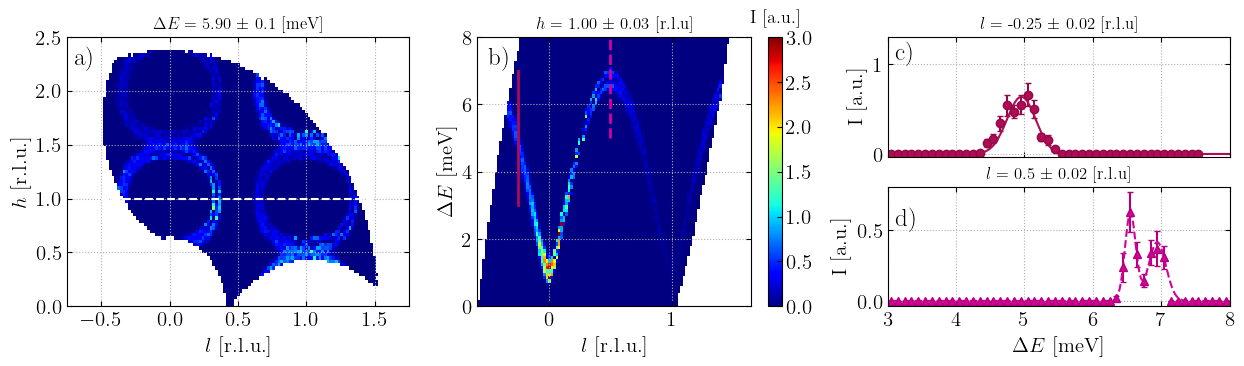

In [14]:
fig = plt.figure(figsize=(15,3.5))

# Create a 1×2 layout first for ax[0] and ax[1]
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1])
gs.update(wspace=0.2, hspace=0.3)

# --------------------------------------------------
# ax[0] and ax[1] remain the same
# --------------------------------------------------
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

# --------------------------------------------------
# Replace the single ax[2] with two stacked axes
# --------------------------------------------------
gs_right = gridspec.GridSpecFromSubplotSpec(
    2, 1,
    subplot_spec=gs[2],     # this occupies the space where ax[2] originally was
    height_ratios=[1,1],    # equally sized
    hspace=0.25
)

ax2_top = fig.add_subplot(gs_right[0])
ax2_bottom = fig.add_subplot(gs_right[1])

"""
B = 1T
"""
im_1p5T = ax0.pcolormesh(p1_Energy_1p5T.coords['l'].values, p1_Energy_1p5T.coords['h'].values, p1_Energy_1p5T.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
#cbar = plt.colorbar(im0)
#cbar.set_label('I [a.u.]')
ax0.plot(np.linspace(-0.5,1.5,100), np.ones(100), '--', color='white')
ax0.set_xlim(-0.75,1.75)
ax0.set_ylim(0,2.5)
ax0.set_xlabel('$l$ [r.l.u.]')
ax0.set_ylabel('$h$ [r.l.u.]')
ax0.set_title(rf"$\Delta E =$ {E_layer.value:.2f} $\pm$ 0.1 [meV]", fontsize=12)
ax0.text(-0.7, 2.25, r'a)', weight='bold', color='black', fontsize=18)
ax0.grid(linestyle='dotted')



im1_1p5T = ax1.pcolormesh(p1_1p5T.coords['l'].values, p1_1p5T.coords['deltaE'].values, p1_1p5T.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
cbar_1p5T = plt.colorbar(im1_1p5T)
cbar_1p5T.ax.set_title('I [a.u.]', fontsize=13, pad=10)
ax1.plot(np.ones(100)*l_slice.value, np.linspace(3,7,100), '-', color='#B00B55',lw=2)
ax1.plot(np.ones(100)*l_slice2.value, np.linspace(5,8,100), '--', color='#d2039b',lw=2)  
ax1.set_ylim(0,8)
ax1.set_xlabel('$l$ [r.l.u.]')
ax1.set_ylabel('$\Delta E$ [meV]')
ax1.set_title(rf"$h =$ {h_layer.value:.2f} $\pm$ 0.03 [r.l.u]", fontsize=12)
ax1.text(-0.5, 7.2, r'b)', weight='bold', color='black', fontsize=18)
ax1.grid(linestyle='dotted')


ax2_top.errorbar(E_1p5T, p2_1p5T.values, np.sqrt(p2_1p5T.variances),
                 fmt='o', markerfacecolor='#B00B55',
                 ecolor='#910946', mew=1, markeredgecolor='#910946',
                 label='B = 3T data')

ax2_top.plot(E_range, gaussN(E_range, *fit_1p5T_1.values),
             '-', color='#B00B55', label='Fit')

ax2_top.set_ylabel("I [a.u.]")
ax2_top.set_xlim(3,8)
ax2_top.set_ylim(-0.03,1.3)
ax2_top.grid(linestyle='dotted')
ax2_top.set_xticklabels([])  # remove x-labels for top plot
#ax2_top.legend(fontsize=9, loc='upper right')
ax2_top.text(3.1, 1.05, r'c)', weight='bold', color='black', fontsize=18)
ax2_top.set_title(f'$l =$ -0.25 $\pm$ 0.02 [r.l.u]', fontsize=12)


ax2_bottom.errorbar(E_1p5Tz, p2_1p5Tz.values, np.sqrt(p2_1p5Tz.variances),fmt='^', color="#d2039b", ecolor='#b3007a', mew=1, markeredgecolor='#b3007a', label='B = 1T data')

ax2_bottom.plot(E_range, gaussN(E_range, *fit_1p5T_1z.values), '--', color='#d2039b', label='Fit')

ax2_bottom.text(3.1, 0.53, r'd)', weight='bold', color='black', fontsize=18)
ax2_bottom.set_xlim(3,8)
#ax2_bottom.legend(fontsize=9, loc='upper center')
ax2_bottom.grid(linestyle='dotted')
ax2_bottom.set_xlabel('$\\Delta E$ [meV]')
ax2_bottom.set_ylabel("I [a.u.]")
ax2_bottom.grid(linestyle='dotted')
ax2_bottom.set_title(f'$l =$ 0.5 $\pm$ 0.02 [r.l.u]', fontsize=12)


plt.savefig('../../Figures/PNG/Magnon_zeeman_1p5T.png', format='png',dpi=200, bbox_inches='tight')
plt.savefig('../../Figures/SVG/Magnon_zeeman_1p5T.svg', format='svg',dpi=200, bbox_inches='tight')

### Load 2 T data

In [15]:
with h5py.File('Magnon_v3_1ms_2T.hdf5', 'r') as file:
    data_I = file['data/values'][:]
    variances_I = file['data/variances'][:]

    qx = file['coords/elem_000_qx/values'][:]
    qy = file['coords/elem_001_qy/values'][:]
    deltaE = file['coords/elem_002_deltaE/values'][:]

print(np.shape(data_I))

qx_1ms = sc.array(dims=["qx"], values=qx, unit="Å^(-1)")
qy_1ms = sc.array(dims=["qy"], values=qy, unit="Å^(-1)")
deltaE_1ms = sc.array(dims=["deltaE"], values=deltaE, unit="meV")

sliced_1ms = sc.DataArray(
    data=sc.array(dims=['qx', 'qy', 'deltaE'], values=data_I, unit="arb. units", variances=variances_I),  #, variances=settings[1]
    coords={"qx": qx_1ms, "qy": qy_1ms, "deltaE":deltaE_1ms}
)

transformed_2T = sliced_1ms.transform_coords(['l'], graph=graph)
sliced_2T = transformed_2T.transform_coords(['h'], graph=graph2)

(112, 87, 95)


In [16]:
"""
2D Slice at a given DeltaE-value: returns a colorplot with l on the x-axis and h on the y-axis.  
"""

p1_Energy_2T = sliced_2T['deltaE', E_layer]['h', h_min:h_max].transpose()

h_layer_2T = sliced_2T.coords['h'].values


"""
2D Slice at a given h-value: returns a colorplot with l on the x-axis.  
"""

p1_2T = sliced_2T['h', h_layer]['deltaE', E_min:E_max].transpose()

"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

l_size = p1_2T.coords['l'].values

p2_2T = p1_2T['deltaE', E_min:E_max]['l',l_slice]
E_2T = p2_2T.coords['deltaE'].values
E_2T = (E_2T[:-1] + E_2T[1:]) / 2.0


#### Plotting of the cut

guess_2T_1 = {'A':0.8, 'mu': 5, 'sigma':0.5}

fit_2T_1 = fit(E_2T, p2_2T.values, np.sqrt(p2_2T.variances),gauss, guess_2T_1)
#fit_2T_1.hesse()

guess_2T_2 = {'A':0.6, 'mu': 4.5, 'sigma':0.3,
               'A2': 0.6, 'mu2':5.2, 'sigma2':0.3}

fit_2T_2 = fit(E_2T, p2_2T.values, np.sqrt(p2_2T.variances),gaussN, guess_2T_2)
fit_2T_2.hesse()


Given names not corresponding to function, overwriting...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 22.74                      │              Nfcn = 349              │
│ EDM = 2.32e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A      │   0.36    │   0.10    │            │            │         │         │       │
│ 1 │ mu     │   4.62    │   0.06    │            │            │         │         │       │
│ 2 │ sigma  │   0.132   │   0.020   │            │            │         │         │       │
│ 3 │ A2     │   0.53    │   0.07    │            │            │         │         │       │
│ 4 │ mu2    │   5.04    │   0.05    │            │            │         │         │       │
│ 5 │ sigma2 │   0.18    │   0.04    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────────────────────────────────────────────┐
│        │        A       mu    sigma       A2      mu2   sigma2 │
├────────┼───────────────────────────────────────────────────────┤
│      A │   0.0095  0.00461  0.00127  0.00182  0.00436 -0.00304 │
│     mu │  0.00461  0.00365  0.00114  0.00069  0.00292 -0.00194 │
│  sigma │  0.00127  0.00114 0.000418  0.00017 0.000914  -0.0006 │
│     A2 │  0.00182  0.00069  0.00017  0.00484  0.00108 -0.00129 │
│    mu2 │  0.00436  0.00292 0.000914  0.00108  0.00286 -0.00185 │
│ sigma2 │ -0.00304 -0.00194  -0.0006 -0.00129 -0.00185  0.00142 │
└────────┴───────────────────────────────────────────────────────┘

In [17]:

"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

p2_2Tz = p1_2T['deltaE', E_min:E_max]['l',l_slice2]
E_2Tz = p2_2Tz.coords['deltaE'].values
E_2Tz = (E_2Tz[:-1] + E_2Tz[1:]) / 2.0


#### Plotting of the cut

guess_2T_1z = {'A':1, 'mu': 7, 'sigma':0.5}

fit_2T_1z = fit(E_2Tz, p2_2Tz.values, np.sqrt(p2_2Tz.variances),gauss, guess_2T_1z)
fit_2T_1z.hesse()


guess_2T_2z = {'A':0.6, 'mu': 6.2, 'sigma':0.3,
               'A2': 0.6, 'mu2':7.0, 'sigma2':0.3}

fit_2T_2z = fit(E_2Tz, p2_2Tz.values, np.sqrt(p2_2Tz.variances),gaussN, guess_2T_2z)
fit_2T_2z.hesse()

Given names not corresponding to function, overwriting...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.019                      │              Nfcn = 864              │
│ EDM = 2.64e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A      │   0.42    │   0.12    │            │            │         │         │       │
│ 1 │ mu     │   6.445   │   0.019   │            │            │         │         │       │
│ 2 │ sigma  │   0.074   │   0.009   │            │            │         │         │       │
│ 3 │ A2     │   0.52    │   0.09    │            │            │         │         │       │
│ 4 │ mu2    │   6.975   │   0.010   │            │            │         │         │       │
│ 5 │ sigma2 │   0.077   │   0.005   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────┐
│        │         A        mu     sigma        A2       mu2    sigma2 │
├────────┼─────────────────────────────────────────────────────────────┤
│      A │    0.0154   0.00104 -0.000743    -2e-05 -9.21e-06  6.45e-06 │
│     mu │   0.00104  0.000349 -0.000134 -1.27e-06 -9.46e-07  5.85e-07 │
│  sigma │ -0.000743 -0.000134  8.03e-05  3.23e-06  1.21e-06 -9.07e-07 │
│     A2 │    -2e-05 -1.27e-06  3.23e-06   0.00783 -0.000136  -0.00023 │
│    mu2 │ -9.21e-06 -9.46e-07  1.21e-06 -0.000136  9.36e-05  8.02e-06 │
│ sigma2 │  6.45e-06  5.85e-07 -9.07e-07  -0.00023  8.02e-06  2.43e-05 │
└────────┴─────────────────────────────────────────────────────────────┘

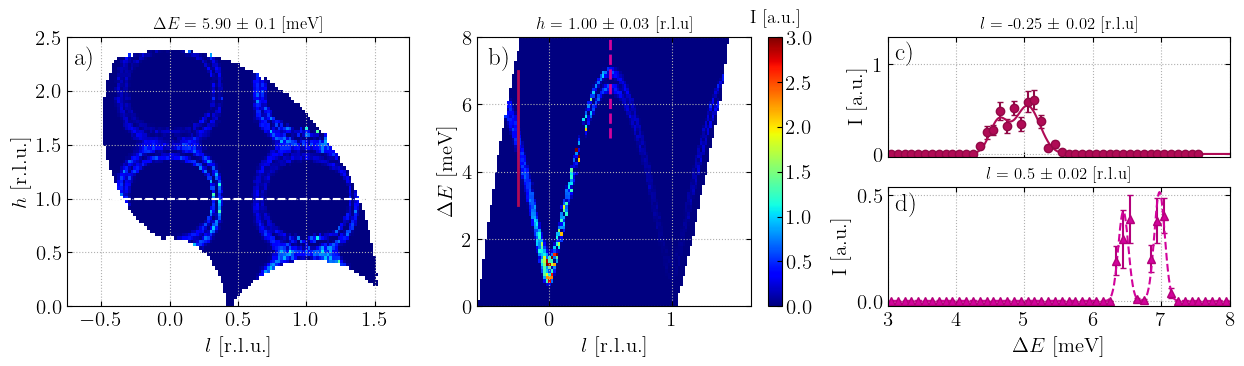

In [18]:
fig = plt.figure(figsize=(15,3.5))

# Create a 1×2 layout first for ax[0] and ax[1]
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1])
gs.update(wspace=0.2, hspace=0.3)

# --------------------------------------------------
# ax[0] and ax[1] remain the same
# --------------------------------------------------
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

# --------------------------------------------------
# Replace the single ax[2] with two stacked axes
# --------------------------------------------------
gs_right = gridspec.GridSpecFromSubplotSpec(
    2, 1,
    subplot_spec=gs[2],     # this occupies the space where ax[2] originally was
    height_ratios=[1,1],    # equally sized
    hspace=0.25
)

ax2_top = fig.add_subplot(gs_right[0])
ax2_bottom = fig.add_subplot(gs_right[1])

"""
B = 2T
"""
im_2T = ax0.pcolormesh(p1_Energy_2T.coords['l'].values, p1_Energy_2T.coords['h'].values, p1_Energy_2T.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
#cbar = plt.colorbar(im0)
#cbar.set_label('I [a.u.]')
ax0.plot(np.linspace(-0.5,1.5,100), np.ones(100), '--', color='white')
ax0.set_xlim(-0.75,1.75)
ax0.set_ylim(0,2.5)
ax0.set_xlabel('$l$ [r.l.u.]')
ax0.set_ylabel('$h$ [r.l.u.]')
ax0.set_title(rf"$\Delta E =$ {E_layer.value:.2f} $\pm$ 0.1 [meV]", fontsize=12)
ax0.text(-0.7, 2.25, r'a)', weight='bold', color='black', fontsize=18)
ax0.grid(linestyle='dotted')



im1_2T = ax1.pcolormesh(p1_2T.coords['l'].values, p1_2T.coords['deltaE'].values, p1_2T.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
cbar_2T = plt.colorbar(im1_2T)
cbar_2T.ax.set_title('I [a.u.]', fontsize=13, pad=10)
ax1.plot(np.ones(100)*l_slice.value, np.linspace(3,7,100), '-', color='#B00B55',lw=2)
ax1.plot(np.ones(100)*l_slice2.value, np.linspace(5,8,100), '--', color='#d2039b',lw=2)  
ax1.set_ylim(0,8)
ax1.set_xlabel('$l$ [r.l.u.]')
ax1.set_ylabel('$\Delta E$ [meV]')
ax1.set_title(rf"$h =$ {h_layer.value:.2f} $\pm$ 0.03 [r.l.u]", fontsize=12)
ax1.text(-0.5, 7.2, r'b)', weight='bold', color='black', fontsize=18)
ax1.grid(linestyle='dotted')


ax2_top.errorbar(E_2T, p2_2T.values, np.sqrt(p2_2T.variances),
                 fmt='o', markerfacecolor='#B00B55',
                 ecolor='#910946', mew=1, markeredgecolor='#910946',
                 label='B = 2T data')

ax2_top.plot(E_range, gaussN(E_range, *fit_2T_2.values),
             '-', color='#B00B55', label='Fit')

ax2_top.set_ylabel("I [a.u.]")
ax2_top.set_xlim(3,8)
ax2_top.set_ylim(-0.03,1.3)
ax2_top.grid(linestyle='dotted')
ax2_top.set_xticklabels([])  # remove x-labels for top plot
#ax2_top.legend(fontsize=9, loc='upper right')
ax2_top.text(3.1, 1.05, r'c)', weight='bold', color='black', fontsize=18)
ax2_top.set_title(f'$l =$ -0.25 $\pm$ 0.02 [r.l.u]', fontsize=12)


ax2_bottom.errorbar(E_2Tz, p2_2Tz.values, np.sqrt(p2_2Tz.variances),fmt='^', color="#d2039b", ecolor='#b3007a', mew=1, markeredgecolor='#b3007a', label='B = 2T data')

ax2_bottom.plot(E_range, gaussN(E_range, *fit_2T_2z.values), '--', color='#d2039b', label='Fit')

ax2_bottom.text(3.1,  0.43, r'd)', weight='bold', color='black', fontsize=18)
ax2_bottom.set_xlim(3,8)
#ax2_bottom.legend(fontsize=9, loc='upper center')
ax2_bottom.grid(linestyle='dotted')
ax2_bottom.set_xlabel('$\\Delta E$ [meV]')
ax2_bottom.set_ylabel("I [a.u.]")
ax2_bottom.grid(linestyle='dotted')
ax2_bottom.set_title(f'$l =$ 0.5 $\pm$ 0.02 [r.l.u]', fontsize=12)


plt.savefig('../../Figures/PNG/Magnon_zeeman_2T.png', format='png',dpi=200, bbox_inches='tight')
plt.savefig('../../Figures/SVG/Magnon_zeeman_2T.svg', format='svg',dpi=200, bbox_inches='tight')

In [19]:
############# Wilks Theorem for B = 2 T

red_chi2_1gauss = fit_2T_1.fval/(len(E_2T)-3)
print('1 gauss chi = ', red_chi2_1gauss)
red_chi2_2gauss = fit_2T_2.fval/(len(E_2T)-6)
print('2 gauss chi = ', red_chi2_2gauss)


# Wilks' theorem calculations
delta_chi2 = fit_2T_1.fval -  fit_2T_2.fval

degrees_of_freedom = 6 - 3  # 3 parameters in the  1 Gaussian model, 6 in the 2 gaussian model
p_value = chi2.sf(delta_chi2, degrees_of_freedom)

print('p-value from Wilks = ', p_value)

# Compare reduced chi-squared and return the better fit
if p_value<0.05:
     print("2 gauss is the best model")
if p_value>0.05:
    print("1 gauss is the best model")


1 gauss chi =  0.5270570131639652
2 gauss chi =  0.2842796125501351
p-value from Wilks =  0.0001051070137568798
2 gauss is the best model


### Load 3 T data

In [20]:
with h5py.File('Magnon_v3_1ms_3T.hdf5', 'r') as file:
    data_I = file['data/values'][:]
    variances_I = file['data/variances'][:]

    qx = file['coords/elem_000_qx/values'][:]
    qy = file['coords/elem_001_qy/values'][:]
    deltaE = file['coords/elem_002_deltaE/values'][:]

print(np.shape(data_I))

qx_1ms = sc.array(dims=["qx"], values=qx, unit="Å^(-1)")
qy_1ms = sc.array(dims=["qy"], values=qy, unit="Å^(-1)")
deltaE_1ms = sc.array(dims=["deltaE"], values=deltaE, unit="meV")

sliced_1ms = sc.DataArray(
    data=sc.array(dims=['qx', 'qy', 'deltaE'], values=data_I, unit="arb. units", variances=variances_I),  #, variances=settings[1]
    coords={"qx": qx_1ms, "qy": qy_1ms, "deltaE":deltaE_1ms}
)

transformed_3T = sliced_1ms.transform_coords(['l'], graph=graph)
sliced_3T = transformed_3T.transform_coords(['h'], graph=graph2)

(112, 87, 95)


In [21]:
"""
2D Slice at a given DeltaE-value: returns a colorplot with l on the x-axis and h on the y-axis.  
"""

p1_Energy_3T = sliced_3T['deltaE', E_layer]['h', h_min:h_max].transpose()

h_layer_3T = sliced_3T.coords['h'].values


"""
2D Slice at a given h-value: returns a colorplot with l on the x-axis.  
"""

p1_3T = sliced_3T['h', h_layer]['deltaE', E_min:E_max].transpose()

"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

l_size = p1_3T.coords['l'].values

p2_3T = p1_3T['deltaE', E_min:E_max]['l',l_slice]
E_3T = p2_3T.coords['deltaE'].values
E_3T = (E_3T[:-1] + E_3T[1:]) / 2.0


#### Plotting of the cut

guess_3T_1 = {'A':1, 'mu': 6, 'sigma':0.5}

fit_3T_1 = fit(E_3T, p2_3T.values, np.sqrt(p2_3T.variances),gauss, guess_3T_1)

guess_3T_2 = {'A':0.4, 'mu': 5.2, 'sigma':0.5,
               'A2': 0.4, 'mu2':4.5, 'sigma2':0.5}

fit_3T_2 = fit(E_3T, p2_3T.values, np.sqrt(p2_3T.variances),gaussN, guess_3T_2)

fit_3T_2.hesse()

Given names not corresponding to function, overwriting...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.189                      │              Nfcn = 824              │
│ EDM = 2.28e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A      │   0.45    │   0.05    │            │            │         │         │       │
│ 1 │ mu     │   4.545   │   0.019   │            │            │         │         │       │
│ 2 │ sigma  │   0.14    │   0.01    │            │            │         │         │       │
│ 3 │ A2     │   0.38    │   0.05    │            │            │         │         │       │
│ 4 │ mu2    │   5.237   │   0.023   │            │            │         │         │       │
│ 5 │ sigma2 │   0.186   │   0.018   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────┐
│        │         A        mu     sigma        A2       mu2    sigma2 │
├────────┼─────────────────────────────────────────────────────────────┤
│      A │   0.00276 -0.000224 -0.000264 -5.37e-05 -9.85e-05  7.89e-05 │
│     mu │ -0.000224  0.000362  0.000128  0.000141  0.000173 -0.000156 │
│  sigma │ -0.000264  0.000128  0.000105     7e-05  8.92e-05 -7.95e-05 │
│     A2 │ -5.37e-05  0.000141     7e-05   0.00232   0.00013 -0.000523 │
│    mu2 │ -9.85e-05  0.000173  8.92e-05   0.00013  0.000507 -0.000157 │
│ sigma2 │  7.89e-05 -0.000156 -7.95e-05 -0.000523 -0.000157  0.000334 │
└────────┴─────────────────────────────────────────────────────────────┘

In [22]:

"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

p2_3Tz = p1_3T['deltaE', E_min:E_max]['l',l_slice2]
E_3Tz = p2_3Tz.coords['deltaE'].values
E_3Tz = (E_3Tz[:-1] + E_3Tz[1:]) / 2.0


#### Plotting of the cut

guess_3T_1z = {'A':1, 'mu': 7, 'sigma':0.5}

fit_3T_1z = fit(E_3Tz, p2_3Tz.values, np.sqrt(p2_3Tz.variances),gauss, guess_3T_1z)
fit_3T_1z.hesse()


guess_3T_2z = {'A':0.6, 'mu': 6.2, 'sigma':0.3,
               'A2': 0.6, 'mu2':7.1, 'sigma2':0.3}

fit_3T_2z = fit(E_3Tz, p2_3Tz.values, np.sqrt(p2_3Tz.variances),gaussN, guess_3T_2z)
fit_3T_2z.hesse()

Given names not corresponding to function, overwriting...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.652                      │             Nfcn = 1085              │
│ EDM = 6.91e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A      │   0.45    │   0.12    │            │            │         │         │       │
│ 1 │ mu     │   6.357   │   0.019   │            │            │         │         │       │
│ 2 │ sigma  │   0.093   │   0.021   │            │            │         │         │       │
│ 3 │ A2     │   0.55    │   0.09    │            │            │         │         │       │
│ 4 │ mu2    │   7.111   │   0.021   │            │            │         │         │       │
│ 5 │ sigma2 │   0.076   │   0.007   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────┐
│        │         A        mu     sigma        A2       mu2    sigma2 │
├────────┼─────────────────────────────────────────────────────────────┤
│      A │    0.0136  0.000105   -0.0018 -3.52e-06  5.59e-07  1.38e-06 │
│     mu │  0.000105   0.00035  4.53e-05  2.38e-07 -3.77e-08 -9.28e-08 │
│  sigma │   -0.0018  4.53e-05  0.000461   9.6e-07 -1.52e-07 -3.75e-07 │
│     A2 │ -3.52e-06  2.38e-07   9.6e-07   0.00782   6.7e-05 -9.37e-05 │
│    mu2 │  5.59e-07 -3.77e-08 -1.52e-07   6.7e-05   0.00045  0.000131 │
│ sigma2 │  1.38e-06 -9.28e-08 -3.75e-07 -9.37e-05  0.000131  4.83e-05 │
└────────┴─────────────────────────────────────────────────────────────┘

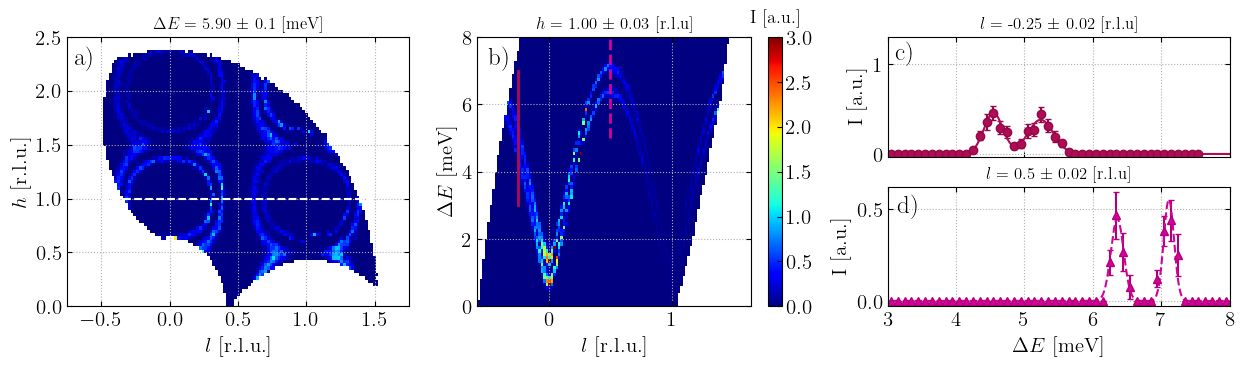

In [23]:
fig = plt.figure(figsize=(15,3.5))

# Create a 1×2 layout first for ax[0] and ax[1]
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1])
gs.update(wspace=0.2, hspace=0.3)

# --------------------------------------------------
# ax[0] and ax[1] remain the same
# --------------------------------------------------
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

# --------------------------------------------------
# Replace the single ax[2] with two stacked axes
# --------------------------------------------------
gs_right = gridspec.GridSpecFromSubplotSpec(
    2, 1,
    subplot_spec=gs[2],     # this occupies the space where ax[2] originally was
    height_ratios=[1,1],    # equally sized
    hspace=0.25
)

ax2_top = fig.add_subplot(gs_right[0])
ax2_bottom = fig.add_subplot(gs_right[1])

"""
B = 3T
"""
im_3T = ax0.pcolormesh(p1_Energy_3T.coords['l'].values, p1_Energy_3T.coords['h'].values, p1_Energy_3T.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
#cbar = plt.colorbar(im0)
#cbar.set_label('I [a.u.]')
ax0.plot(np.linspace(-0.5,1.5,100), np.ones(100), '--', color='white')
ax0.set_xlim(-0.75,1.75)
ax0.set_ylim(0,2.5)
ax0.set_xlabel('$l$ [r.l.u.]')
ax0.set_ylabel('$h$ [r.l.u.]')
ax0.set_title(rf"$\Delta E =$ {E_layer.value:.2f} $\pm$ 0.1 [meV]", fontsize=12)
ax0.text(-0.7, 2.25, r'a)', weight='bold', color='black', fontsize=18)
ax0.grid(linestyle='dotted')



im1_3T = ax1.pcolormesh(p1_3T.coords['l'].values, p1_3T.coords['deltaE'].values, p1_3T.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
cbar_3T = plt.colorbar(im1_3T)
cbar_3T.ax.set_title('I [a.u.]', fontsize=13, pad=10)
ax1.plot(np.ones(100)*l_slice.value, np.linspace(3,7,100), '-', color='#B00B55',lw=2)
ax1.plot(np.ones(100)*l_slice2.value, np.linspace(5,8,100), '--', color='#d2039b',lw=2)  
ax1.set_ylim(0,8)
ax1.set_xlabel('$l$ [r.l.u.]')
ax1.set_ylabel('$\Delta E$ [meV]')
ax1.set_title(rf"$h =$ {h_layer.value:.2f} $\pm$ 0.03 [r.l.u]", fontsize=12)
ax1.text(-0.5, 7.2, r'b)', weight='bold', color='black', fontsize=18)
ax1.grid(linestyle='dotted')


ax2_top.errorbar(E_3T, p2_3T.values, np.sqrt(p2_3T.variances),
                 fmt='o', markerfacecolor='#B00B55',
                 ecolor='#910946', mew=1, markeredgecolor='#910946',
                 label='B = 3T data')

ax2_top.plot(E_range, gaussN(E_range, *fit_3T_2.values),
             '-', color='#B00B55', label='Fit')

ax2_top.set_ylabel("I [a.u.]")
ax2_top.set_xlim(3,8)
ax2_top.set_ylim(-0.03,1.3)
ax2_top.grid(linestyle='dotted')
ax2_top.set_xticklabels([])  # remove x-labels for top plot
#ax2_top.legend(fontsize=9, loc='upper right')
ax2_top.text(3.1, 1.05, r'c)', weight='bold', color='black', fontsize=18)
ax2_top.set_title(f'$l =$ -0.25 $\pm$ 0.02 [r.l.u]', fontsize=12)


ax2_bottom.errorbar(E_3Tz, p2_3Tz.values, np.sqrt(p2_3Tz.variances),fmt='^', color="#d2039b", ecolor='#b3007a', mew=1, markeredgecolor='#b3007a', label='B = 3T data')

ax2_bottom.plot(E_range, gaussN(E_range, *fit_3T_2z.values), '--', color='#d2039b', label='Fit')

ax2_bottom.text(3.14,  0.48, r'd)', weight='bold', color='black', fontsize=18)
ax2_bottom.set_xlim(3,8)
#ax2_bottom.legend(fontsize=9, loc='upper center')
ax2_bottom.grid(linestyle='dotted')
ax2_bottom.set_xlabel('$\\Delta E$ [meV]')
ax2_bottom.set_ylabel("I [a.u.]")
ax2_bottom.grid(linestyle='dotted')
ax2_bottom.set_title(f'$l =$ 0.5 $\pm$ 0.02 [r.l.u]', fontsize=12)


plt.savefig('../../Figures/PNG/Magnon_zeeman_3T.png', format='png',dpi=200, bbox_inches='tight')
plt.savefig('../../Figures/SVG/Magnon_zeeman_3T.svg', format='svg',dpi=200, bbox_inches='tight')

### Load 5 T data

In [24]:
with h5py.File('Magnon_v3_1ms_5T.hdf5', 'r') as file:
    data_I = file['data/values'][:]
    variances_I = file['data/variances'][:]

    qx = file['coords/elem_000_qx/values'][:]
    qy = file['coords/elem_001_qy/values'][:]
    deltaE = file['coords/elem_002_deltaE/values'][:]

print(np.shape(data_I))

qx_1ms = sc.array(dims=["qx"], values=qx, unit="Å^(-1)")
qy_1ms = sc.array(dims=["qy"], values=qy, unit="Å^(-1)")
deltaE_1ms = sc.array(dims=["deltaE"], values=deltaE, unit="meV")

sliced_1ms = sc.DataArray(
    data=sc.array(dims=['qx', 'qy', 'deltaE'], values=data_I, unit="arb. units", variances=variances_I),  #, variances=settings[1]
    coords={"qx": qx_1ms, "qy": qy_1ms, "deltaE":deltaE_1ms}
)

transformed_5T = sliced_1ms.transform_coords(['l'], graph=graph)
sliced_5T = transformed_5T.transform_coords(['h'], graph=graph2)

(112, 87, 95)


In [25]:
"""
2D Slice at a given DeltaE-value: returns a colorplot with l on the x-axis and h on the y-axis.  
"""

p1_Energy_5T = sliced_5T['deltaE', E_layer]['h', h_min:h_max].transpose()

h_layer_5T = sliced_5T.coords['h'].values


"""
2D Slice at a given h-value: returns a colorplot with l on the x-axis.  
"""

p1_5T = sliced_5T['h', h_layer]['deltaE', E_min:E_max].transpose()

"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""
l_size = p1_5T.coords['l'].values

p2_5T = p1_5T['deltaE', E_min:E_max]['l',l_slice]
E_5T = p2_5T.coords['deltaE'].values
E_5T = (E_5T[:-1] + E_5T[1:]) / 2.0


#### Plotting of the cut

guess_5T_1 = {'A':1, 'mu': 5, 'sigma':0.5}

fit_5T_1 = fit(E_5T, p2_5T.values, np.sqrt(p2_5T.variances),gauss, guess_5T_1)
fit_5T_1.hesse()

guess_5T_2 = {'A':0.50, 'mu': 4.285	, 'sigma':0.166,
               'A2': 0.5, 'mu2':5.3, 'sigma2':0.3}

lim_5T_2 = {'A': (0.48,0.52),'mu':(4.32,5.6), 'sigma':(0.15,0.5),
                'A2': (0.50,0.55),'mu2':(5.46,5.6), 'sigma2':(0.16,0.5)}

fit_5T_2 = fit(E_5T, p2_5T.values, np.sqrt(p2_5T.variances),gaussN, guess_5T_2, limits=lim_5T_2)

fit_5T_2.hesse()

Given names not corresponding to function, overwriting...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.12e+05                   │              Nfcn = 451              │
│ EDM = 0.000352 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A      │   0.508   │   0.032   │            │            │  0.48   │  0.52   │       │
│ 1 │ mu     │  4.3200   │  0.0029   │            │            │  4.32   │   5.6   │       │
│ 2 │ sigma  │   0.160   │   0.005   │            │            │  0.15   │   0.5   │       │
│ 3 │ A2     │500.0000e-3│ 0.0022e-3 │            │            │   0.5   │  0.55   │       │
│ 4 │ mu2    │5.46000000 │0.00000024 │            │            │  5.46   │   5.6   │       │
│ 5 │ sigma2 │160.00000e-3│0.00008e-3 │            │            │  0.16   │   0.5   │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────┐
│        │         A        mu     sigma        A2       mu2    sigma2 │
├────────┼─────────────────────────────────────────────────────────────┤
│      A │   0.00238  6.69e-13 -0.000116 -3.52e-20  4.61e-20 -4.61e-20 │
│     mu │  6.69e-13  6.77e-16 -3.49e-12 -1.68e-28  2.76e-29 -4.22e-29 │
│  sigma │ -0.000116 -3.49e-12  2.94e-05  1.48e-20 -1.96e-20  1.98e-20 │
│     A2 │ -3.52e-20 -1.68e-28  1.48e-20  1.37e-22 -1.82e-29 -1.55e-29 │
│    mu2 │  4.61e-20  2.76e-29 -1.96e-20 -1.82e-29  1.72e-22 -1.52e-29 │
│ sigma2 │ -4.61e-20 -4.22e-29  1.98e-20 -1.55e-29 -1.52e-29  1.24e-22 │
└────────┴─────────────────────────────────────────────────────────────┘

In [26]:

"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

p2_5Tz = p1_5T['deltaE', E_min:E_max]['l',l_slice2]
E_5Tz = p2_5Tz.coords['deltaE'].values
E_5Tz = (E_5Tz[:-1] + E_5Tz[1:]) / 2.0


#### Plotting of the cut

guess_5T_1z = {'A':1, 'mu': 7, 'sigma':0.5}

fit_5T_1z = fit(E_5Tz, p2_5Tz.values, np.sqrt(p2_5Tz.variances),gauss, guess_5T_1z)
fit_5T_1z.hesse()


guess_5T_2z = {'A':0.6, 'mu': 6.1, 'sigma':0.3,
               'A2': 0.6, 'mu2':7.2, 'sigma2':0.3}

fit_5T_2z = fit(E_5Tz, p2_5Tz.values, np.sqrt(p2_5Tz.variances),gaussN, guess_5T_2z)
fit_5T_2z.hesse()

Given names not corresponding to function, overwriting...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.3052                     │              Nfcn = 537              │
│ EDM = 3.09e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A      │   0.47    │   0.10    │            │            │         │         │       │
│ 1 │ mu     │   6.131   │   0.015   │            │            │         │         │       │
│ 2 │ sigma  │   0.076   │   0.010   │            │            │         │         │       │
│ 3 │ A2     │   0.46    │   0.09    │            │            │         │         │       │
│ 4 │ mu2    │   7.361   │   0.014   │            │            │         │         │       │
│ 5 │ sigma2 │   0.084   │   0.008   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────┐
│        │         A        mu     sigma        A2       mu2    sigma2 │
├────────┼─────────────────────────────────────────────────────────────┤
│      A │    0.0102 -0.000269 -0.000591 -1.77e-11 -2.14e-12 -5.32e-13 │
│     mu │ -0.000269  0.000216  4.15e-05 -1.79e-12  1.82e-13  2.22e-13 │
│  sigma │ -0.000591  4.15e-05  0.000105 -2.33e-12 -1.55e-13  1.74e-14 │
│     A2 │ -1.77e-11 -1.79e-12 -2.33e-12   0.00833  9.73e-05 -0.000379 │
│    mu2 │ -2.14e-12  1.82e-13 -1.55e-13  9.73e-05  0.000181  4.51e-05 │
│ sigma2 │ -5.32e-13  2.22e-13  1.74e-14 -0.000379  4.51e-05  6.55e-05 │
└────────┴─────────────────────────────────────────────────────────────┘

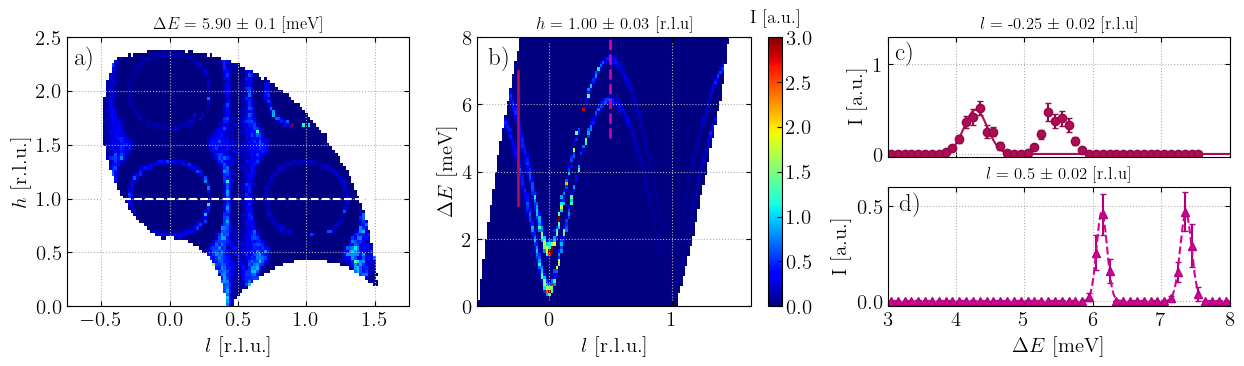

In [27]:
fig = plt.figure(figsize=(15,3.5))

# Create a 1×2 layout first for ax[0] and ax[1]
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1])
gs.update(wspace=0.2, hspace=0.3)

# --------------------------------------------------
# ax[0] and ax[1] remain the same
# --------------------------------------------------
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

# --------------------------------------------------
# Replace the single ax[2] with two stacked axes
# --------------------------------------------------
gs_right = gridspec.GridSpecFromSubplotSpec(
    2, 1,
    subplot_spec=gs[2],     # this occupies the space where ax[2] originally was
    height_ratios=[1,1],    # equally sized
    hspace=0.25
)

ax2_top = fig.add_subplot(gs_right[0])
ax2_bottom = fig.add_subplot(gs_right[1])

"""
B = 5T
"""
im_5T = ax0.pcolormesh(p1_Energy_5T.coords['l'].values, p1_Energy_5T.coords['h'].values, p1_Energy_5T.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
#cbar = plt.colorbar(im0)
#cbar.set_label('I [a.u.]')
ax0.plot(np.linspace(-0.5,1.5,100), np.ones(100), '--', color='white')
ax0.set_xlim(-0.75,1.75)
ax0.set_ylim(0,2.5)
ax0.set_xlabel('$l$ [r.l.u.]')
ax0.set_ylabel('$h$ [r.l.u.]')
ax0.set_title(rf"$\Delta E =$ {E_layer.value:.2f} $\pm$ 0.1 [meV]", fontsize=12)
ax0.text(-0.7, 2.25, r'a)', weight='bold', color='black', fontsize=18)
ax0.grid(linestyle='dotted')



im1_5T = ax1.pcolormesh(p1_5T.coords['l'].values, p1_5T.coords['deltaE'].values, p1_5T.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
cbar_5T = plt.colorbar(im1_5T)
cbar_5T.ax.set_title('I [a.u.]', fontsize=13, pad=10)
ax1.plot(np.ones(100)*l_slice.value, np.linspace(3,7,100), '-', color='#B00B55',lw=2)
ax1.plot(np.ones(100)*l_slice2.value, np.linspace(5,8,100), '--', color='#d2039b',lw=2)  
ax1.set_ylim(0,8)
ax1.set_xlabel('$l$ [r.l.u.]')
ax1.set_ylabel('$\Delta E$ [meV]')
ax1.set_title(rf"$h =$ {h_layer.value:.2f} $\pm$ 0.03 [r.l.u]", fontsize=12)
ax1.text(-0.5, 7.2, r'b)', weight='bold', color='black', fontsize=18)
ax1.grid(linestyle='dotted')


ax2_top.errorbar(E_5T, p2_5T.values, np.sqrt(p2_5T.variances),
                 fmt='o', markerfacecolor='#B00B55',
                 ecolor='#910946', mew=1, markeredgecolor='#910946',
                 label='B = 3T data')

ax2_top.plot(E_range, gauss(E_range, *fit_5T_1.values),
             '-', color='#B00B55', label='Fit')

ax2_top.set_ylabel("I [a.u.]")
ax2_top.set_xlim(3,8)
ax2_top.set_ylim(-0.03,1.3)
ax2_top.grid(linestyle='dotted')
ax2_top.set_xticklabels([])  # remove x-labels for top plot
#ax2_top.legend(fontsize=9, loc='upper right')
ax2_top.text(3.1, 1.05, r'c)', weight='bold', color='black', fontsize=18)
ax2_top.set_title(f'$l =$ -0.25 $\pm$ 0.02 [r.l.u]', fontsize=12)


ax2_bottom.errorbar(E_5Tz, p2_5Tz.values, np.sqrt(p2_5Tz.variances),fmt='^', color="#d2039b", ecolor='#b3007a', mew=1, markeredgecolor='#b3007a', label='B = 5T data')

ax2_bottom.plot(E_range, gaussN(E_range, *fit_5T_2z.values), '--', color='#d2039b', label='Fit')

ax2_bottom.text(3.16, 0.48, r'd)', weight='bold', color='black', fontsize=18)
ax2_bottom.set_xlim(3,8)
#ax2_bottom.legend(fontsize=9)
ax2_bottom.grid(linestyle='dotted')
ax2_bottom.set_xlabel('$\\Delta E$ [meV]')
ax2_bottom.set_ylabel("I [a.u.]")
ax2_bottom.grid(linestyle='dotted')
ax2_bottom.set_title(f'$l =$ 0.5 $\pm$ 0.02 [r.l.u]', fontsize=12)


plt.savefig('../../Figures/PNG/Magnon_zeeman_5T.png', format='png',dpi=200, bbox_inches='tight')
plt.savefig('../../Figures/SVG/Magnon_zeeman_5T.svg', format='svg',dpi=200, bbox_inches='tight')

# Comparing the different B-fields

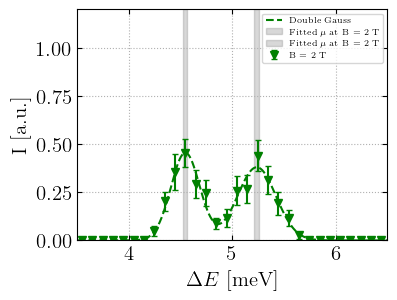

In [28]:

E_range = np.linspace(3.5,6.5,1000)

plt.figure(figsize=(4,3))

######## B = 0 T 
#plt.errorbar(E_0T, p2_0T.values, np.sqrt(p2_0T.variances),  fmt='s', color='#B00B55', ecolor='#910946', mew=1, markeredgecolor='#910946', label='B = 0 T')
#plt.plot(E_range, gauss(E_range, *fit_0T_1.values), '--', color='#B00B55')

######## B = 1 T 
#plt.errorbar(E_1T, p2_1T.values, np.sqrt(p2_1T.variances),  fmt='v', color='#4dbeee', ecolor='#3992b8', mew=1, markeredgecolor='#3992b8', label='B = 1 T') 
#plt.plot(E_range, gauss(E_range, *fit_1T_1.values), '-', color='#4dbeee') 

######## B = 2 T 
plt.errorbar(E_3T, p2_3T.values, np.sqrt(p2_3T.variances),  fmt='v', color='green', ecolor='green', mew=1, markeredgecolor='green', label='B = 2 T') 
#plt.plot(E_range, gauss(E_range, *fit_3T_1.values), '-', color='green', label='Single Gauss')
plt.plot(E_range, gaussN(E_range, *fit_3T_2.values), '--', color='green', label='Double Gauss') 
plt.fill_betweenx(y=[0, 1.2], x1=fit_3T_2.values['mu']-fit_3T_2.errors['mu'], x2=fit_3T_2.values['mu']+fit_3T_2.errors['mu'], color='grey', alpha=0.3, linewidth=1, label='Fitted $\mu$ at B = 2 T')
plt.fill_betweenx(y=[0, 1.2], x1=fit_3T_2.values['mu2']-fit_3T_2.errors['mu2'], x2=fit_3T_2.values['mu2']+fit_3T_2.errors['mu2'], color='grey', alpha=0.3, linewidth=1, label='Fitted $\mu$ at B = 2 T')


######## B = 3 T 
#plt.errorbar(E_3T, p2_3T.values, np.sqrt(p2_3T.variances),  fmt='v', color='m', ecolor='m', mew=1, markeredgecolor='m', label='B = 3 T')
#plt.plot(E_range, gauss(E_range, *fit_3T_1.values), '-', color='m', label='Single Gauss')
#plt.plot(E_range, gaussN(E_range, *fit_3T_2.values), '--', color='m', label='Double Gauss')  

######## B = 5 T 
#plt.errorbar(E_5T, p2_5T.values, np.sqrt(p2_5T.variances),  fmt='-v', color='grey', ecolor='grey', mew=1, markeredgecolor='grey', label='B = 5 T') 
#plt.plot(E_range, gaussN(E_range, *fit_5T_2.values), '--', color='grey', label='Double Gauss')  

#plt.plot(np.ones(100)*fit_0T_1.values['mu'], np.linspace(0,1.2,100),'--', color='k', linewidth=1, label='Fitted $\mu$ at B = 0 T')
#plt.fill_betweenx(y=[0, 1.2], x1=fit_0T_1.values['mu']-fit_0T_1.errors['mu'], x2=fit_0T_1.values['mu']+fit_0T_1.errors['mu'], color='grey', alpha=0.3, linewidth=1, label='Fitted $\mu$ at B = 0 T')


plt.xlabel("$\Delta E$ [meV]")
plt.ylabel("I [a.u.]")
#plt.set_title(f"$l =$ {l_slice2.value:.2f} [r.l.u]")
plt.xlim(3.5,6.5)
plt.ylim(0,1.2)
plt.grid(linestyle='dotted')
plt.legend(fontsize=6)
#plt.text(4.1, 0.89, rf'f)', weight='bold', color='black', fontsize=18)
#plt.title(f'$l =$ 0.8 $\pm$ 0.02 [r.l.u]')


In [29]:

def dist_err_prob(sigma_a, sigma_b): ## Errorpropagation for the formular A-B
    return np.sqrt(sigma_a**2+sigma_b**2-2*sigma_a*sigma_b)

dis1 = fit_1T_1z.values['mu']- fit_0T_1z.values['mu']

dis1p5 = fit_1p5T_1z.values['mu2']- fit_0T_1z.values['mu']
dis1p5_m = fit_1p5T_1z.values['mu1']- fit_0T_1z.values['mu']

dis2 = fit_2T_2z.values['mu2']- fit_0T_1z.values['mu']
dis2_m = fit_2T_2z.values['mu']- fit_0T_1z.values['mu']

dis3 = fit_3T_2z.values['mu2']- fit_0T_1z.values['mu']
dis3_m = fit_3T_2z.values['mu']- fit_0T_1z.values['mu']

dis5 = fit_5T_2z.values['mu2']- fit_0T_1z.values['mu']
dis5_m = fit_5T_2z.values['mu']- fit_0T_1z.values['mu']

dist = np.array([0, dis1, dis1p5, dis2, dis3, dis5])
dist_err = np.array([0, dist_err_prob(fit_1T_1z.errors['mu'], fit_0T_1z.errors['mu']), dist_err_prob(fit_1p5T_1z.errors['mu2'], fit_0T_1z.errors['mu']), dist_err_prob(fit_2T_2z.errors['mu'], fit_0T_1z.errors['mu']), dist_err_prob(fit_3T_2z.errors['mu'], fit_0T_1z.errors['mu']), dist_err_prob(fit_5T_2z.errors['mu2'], fit_0T_1z.errors['mu'])])
#dist_err = np.array([0, fit_1T_1.errors['mu'], fit_3T_2.errors['mu'], fit_3T_2.errors['mu2'], fit_5T_2.errors['mu']])

dist_m = np.array([0, dis1, dis1p5_m, dis2_m, dis3_m, dis5_m,])
#dist_err_m = np.array([0, fit_1T_1.errors['mu'], fit_3T_2.errors['mu2'], fit_3T_2.errors['mu'], fit_5T_2.errors['mu2']])
dist_err_m = np.array([0, dist_err_prob(fit_1T_1z.errors['mu'], fit_0T_1z.errors['mu']), dist_err_prob(fit_1p5T_1z.errors['mu1'], fit_0T_1z.errors['mu']), dist_err_prob(fit_2T_2z.errors['mu2'], fit_0T_1z.errors['mu']), dist_err_prob(fit_3T_2z.errors['mu2'], fit_0T_1z.errors['mu']), dist_err_prob(fit_5T_2z.errors['mu'], fit_0T_1z.errors['mu'])])


print(dist)
print(dist_err)

print(dist_m)
print(dist_err_m)

B = np.array([0,1,1.5,2,3,5])

[ 0.         -0.00875452  0.20789702  0.2421063   0.37870861  0.62808986]
[0.         0.00677398 0.02029049 0.00943963 0.00945577 0.0042062 ]
[ 0.         -0.00875452 -0.18440901 -0.2872262  -0.37584762 -0.60198898]
[0.         0.00677398 0.00543643 0.00042887 0.01197182 0.00543429]


In [30]:
# ------------------------------------------------------------
# 1. Physical constants
# ------------------------------------------------------------
mu_B_J_per_T = 9.2740100783e-24      # Bohr magneton (J/T)
J_to_eV = 1 / 1.602176634e-19        # Convert Joules → eV
eV_to_meV = 1000.0                   # Convert eV → meV

# Convert μB to meV/T
mu_B_eV_per_T = mu_B_J_per_T * J_to_eV
mu_B_meV_per_T = mu_B_eV_per_T * eV_to_meV

# ------------------------------------------------------------
# 2. System parameters for MnF2 (Mn2+)
# ------------------------------------------------------------
g = 2.00        # Landé g-factor for Mn2+ (approximately 2)
delta_m = 1     # Adjacent Zeeman levels (m -> m+1)
B_max = 6.0    # Maximum magnetic field in Tesla
n_points = 201  # Resolution

# Magnetic field range
B_zeeman = np.linspace(0, B_max, n_points)

# Zeeman splitting:
# ΔE = μB * g * Δm * B   (in meV because μB is converted)
deltaE_meV = mu_B_meV_per_T * g * delta_m * B_zeeman

# ------------------------------------------------------------
# 3. Print formula info
# ------------------------------------------------------------
print("Formula used: ΔE = μB · g · Δm · B")
print(f"μB = {mu_B_J_per_T:.12e} J/T = {mu_B_meV_per_T:.6e} meV/T")
print(f"Using g = {g}, Δm = {delta_m}")
print(f"Thus ΔE(meV) = {mu_B_meV_per_T:.6e} * g * Δm * B(T)")

Formula used: ΔE = μB · g · Δm · B
μB = 9.274010078300e-24 J/T = 5.788382e-02 meV/T
Using g = 2.0, Δm = 1
Thus ΔE(meV) = 5.788382e-02 * g * Δm * B(T)


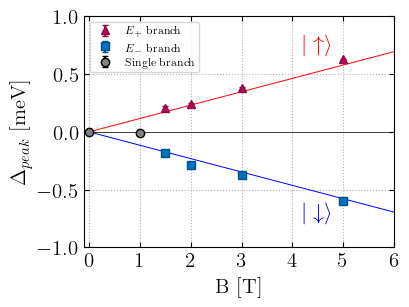

In [33]:
plt.figure(figsize=(4,3))
plt.plot(np.linspace(0,6,100), np.zeros(100),'-', color='k', linewidth=0.5)

plt.errorbar(B[2:6], dist[2:6], dist_err[2:6],fmt='^', label='$E_+$ branch', markerfacecolor='#B00B55', ecolor='#910946', mew=1, markeredgecolor='#910946')
plt.errorbar(B[2:6], dist_m[2:6], dist_err_m[2:6], fmt='s', label='$E_-$ branch', color='#0072BD', markerfacecolor='#0072BD', ecolor='#005287', mew=1,  markeredgecolor='#005287')
plt.errorbar(B[0:2], dist_m[0:2], dist_err_m[0:2], fmt='o', label='Single branch', markersize=6, markerfacecolor='grey',  markeredgecolor='k', ecolor='k')

plt.plot(B_zeeman, deltaE_meV, 'r', linewidth=0.7 )
plt.text(4.2, 0.7, r'$|\uparrow \rangle$', weight='bold', color='red', fontsize=16)

plt.plot(B_zeeman, -1*deltaE_meV, 'b', linewidth=0.7)
plt.text(4.2, -0.75, r'$|\downarrow \rangle$', weight='bold', color='blue', fontsize=16)


plt.xticks([0,1,2,3,4,5,6])
plt.xlim(-0.1,6)
plt.ylim(-1,1)
plt.xlabel(r'B [T]')
plt.legend(fontsize=8)
plt.grid(linestyle='dotted')
plt.ylabel(r'$\Delta_{peak} $ [meV]')

plt.savefig('../../Figures/PNG/Zeeman_resolution_power.png', format='png',dpi=200, bbox_inches='tight')
plt.savefig('../../Figures/SVG/Zeeman_resolution_power.svg', format='svg',dpi=200, bbox_inches='tight')

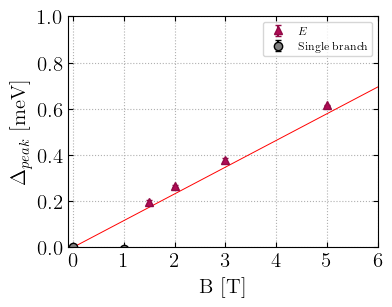

In [35]:
plt.figure(figsize=(4,3))
plt.plot(np.linspace(0,6,100), np.zeros(100),'-', color='k', linewidth=0.5)

plt.errorbar(B[2:6], (dist[2:6]+abs(dist_m[2:6]))/2, 1/2*np.sqrt(dist_err[2:6]**2+abs(dist_err_m[2:6])**2),fmt='^', label='$E$', markerfacecolor='#B00B55', ecolor='#910946', mew=1, markeredgecolor='#910946')
#plt.errorbar(B[2:5], dist_m[2:5], dist_err_m[2:5], fmt='s', label='$E_-$', color='#0072BD', markerfacecolor='#0072BD', ecolor='#005287', mew=1,  markeredgecolor='#005287')
plt.errorbar(B[0:2], dist_m[0:2], dist_err_m[0:2], fmt='o', label='Single branch', markersize=6, markerfacecolor='grey',  markeredgecolor='k', ecolor='k')

plt.plot(B_zeeman, deltaE_meV, 'r', linewidth=0.7 )
#<plt.text(4.2, 0.7, r'$|\uparrow \rangle$', weight='bold', color='red', fontsize=16)

#plt.plot(B_zeeman, -1*deltaE_meV, 'b', linewidth=0.7)
#plt.text(4.2, -0.75, r'$|\downarrow \rangle$', weight='bold', color='blue', fontsize=16)


plt.xticks([0,1,2,3,4,5,6])
plt.xlim(-0.1,6)
plt.ylim(-0,1)
plt.xlabel(r'B [T]')
plt.legend(fontsize=8)
plt.grid(linestyle='dotted')
plt.ylabel(r'$\Delta_{peak} $ [meV]')

plt.savefig('../../Figures/PNG/Zeeman_resolution_power_avg.png', format='png',dpi=200, bbox_inches='tight')
plt.savefig('../../Figures/SVG/Zeeman_resolution_power_avg.svg', format='svg',dpi=200, bbox_inches='tight')